 Problem Statement:
 Given data about COVID-19 patients, write code to visualize the impact and
 analyze the trend of rate of infection and recovery as well as make predictions
 about the number of cases expected a week in future based on the current
 trends.

 Dataset:
 CSV and Excel files containing data about the number of COVID-19 confirmed
 deaths and recovered patients both around the world and in India.

 Guidelines:
 ● Usepandas to accumulate data from multiple data files.
 ● Useplotly (visualization library) to create interactive visualizations.
 ● UseFacebook prophet library to make time series models.
 ● Visualize the prediction by combining these technologies.



Import required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
#import plotly.io as pio
#pio.templates.default = "plotly_white"
#from prophet import Prophet
#from prophet.plot import plot_plotly
#import glob
#import zipfile
#import os


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv("/content/drive/MyDrive/covid_19_clean_complete-1.zip")

In [26]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [29]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [30]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [37]:
num_df = df.select_dtypes(include = 'number')

In [38]:
df_corr = num_df.corr()


In [33]:
df_corr

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044392
Long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085688
Confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255
Deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858
Recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713088
Active,0.044392,-0.085688,0.950255,0.891858,0.713088,1.000000


Creating heatmap to understand better about correlation among features

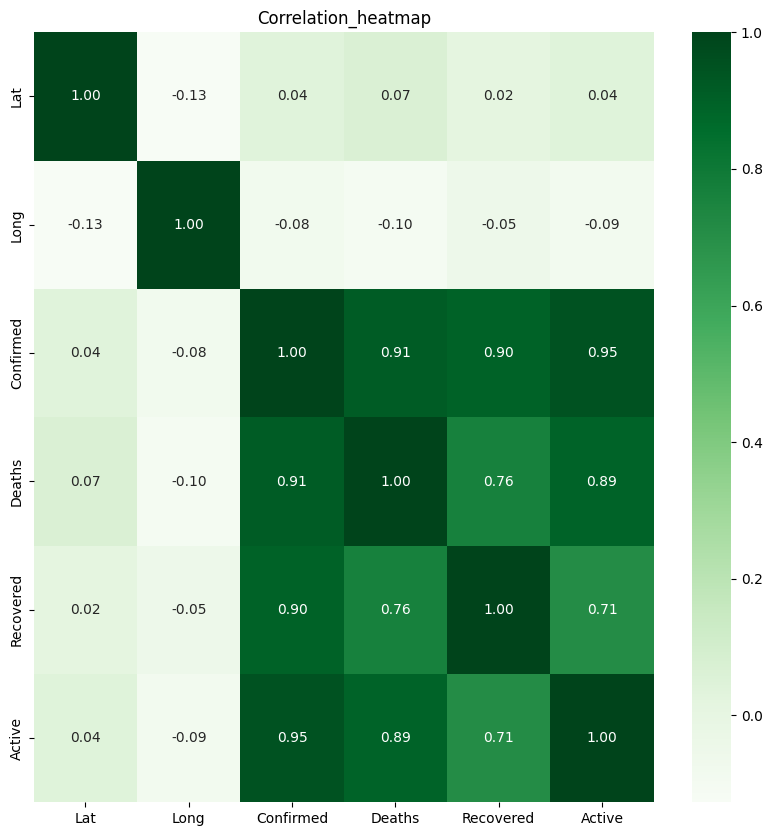

In [40]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'Greens')
plt.title('Correlation_heatmap')
plt.show()

Inference from above heatmap and correlation matrics is that columns : Confirmed, Deaths, Recovered and Active are highly correlated.

In [41]:
num_df.columns

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

Heatmap using plotly.express

In [ ]:

# Creating a heatmap using the correlation matrix
fig = px.imshow(
    df_corr,
    title='Correlation Heatmap',
    labels={'color': 'Correlation'},
    color_continuous_scale='RdBu'
)

# Adding annotations  
annotations = []
for i in range(len(df_corr)):
    for j in range(len(df_corr.columns)):
        annotations.append(
            go.layout.Annotation(
                text=str(round(df_corr.iloc[i, j], 2)),
                x=j,
                y=i,
                showarrow=False,
                font=dict(color='black')
            )
        )

# Customizing the layout
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    width=800,
    height=600,
    margin=dict(l=40, r=40, t=40, b=40),
    coloraxis_colorbar=dict(
        title='Correlation',
        titleside='right',
        ticks='outside'
    ),
    annotations=annotations
)

# Displaying the heatmap
fig.show()


Data cleaning, EDA and Feature Engineering

In [42]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Data cleaning and Preprocessing

In [43]:
df.rename(columns={'Country/Region': 'country', 'Province/State': 'state', 'WHO Region': 'region'}, inplace=True)


In [44]:
df['Date'].dtypes

dtype('O')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   Lat        49068 non-null  float64
 3   Long       49068 non-null  float64
 4   Date       49068 non-null  object 
 5   Confirmed  49068 non-null  int64  
 6   Deaths     49068 non-null  int64  
 7   Recovered  49068 non-null  int64  
 8   Active     49068 non-null  int64  
 9   region     49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [46]:
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
df['Date'].dtypes

dtype('<M8[ns]')

In [48]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Features Selection

Selecting features for data analysis

In [49]:
df2 = df.groupby('Date').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()



In [50]:
df2

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
...,...,...,...,...
183,2020-07-23,15510481,633506,8710969
184,2020-07-24,15791645,639650,8939705
185,2020-07-25,16047190,644517,9158743
186,2020-07-26,16251796,648621,9293464


In [51]:
df2['Active'] = df2['Confirmed'] - df2['Deaths'] - df2['Recovered']


In [52]:
df2 = df2.sort_values('Date')

In [53]:
df2

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


Interactive Visualization

In [54]:
india_indices = df[df['country'] == 'India'].index
print(india_indices)


Index([  129,   390,   651,   912,  1173,  1434,  1695,  1956,  2217,  2478,
       ...
       46587, 46848, 47109, 47370, 47631, 47892, 48153, 48414, 48675, 48936],
      dtype='int64', length=188)


In [55]:
india_indices.shape

(188,)

Ploting Visualization

In [56]:
country = india_indices[0]

fig = px.line(df2, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
fig.show()

In [57]:
country = 'India'

fig = px.line(df2, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
fig.show()

Select country for ploting using reverse indexing

In [58]:
country = df['country'].unique()[-1]

fig = px.line(df2, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
fig.show()

In [ ]:
fig = px.line(
    df2,
    x='Date',
    y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
    title=f'COVID-19 Cases in {df["country"].unique()[100]}',
    labels={'value': 'Count', 'variable': 'Case Type'}
)
fig.show()


Individual column wise updates

Creating Daily Patients Update

In [ ]:
df2['New_Confirmed'] = df2['Confirmed'].diff().fillna(0)
df2['New_Recovered'] = df2['Recovered'].diff().fillna(0)
df2['New_Deaths'] = df2['Deaths'].diff().fillna(0)

OR

Updates using for loop

In [59]:
columns = ['Confirmed', 'Recovered', 'Deaths']
new_columns = ['New_Confirmed', 'New_Recovered', 'New_Deaths']

for old_col, new_col in zip(columns, new_columns):
    df2[new_col] = df2[old_col].diff().fillna(0)


In [60]:
df2.head()

,Date,Confirmed,Deaths,Recovered,Active,New_Confirmed,New_Recovered,New_Deaths
0,2020-01-22,555,17,28,510,0.0,0.0,0.0
1,2020-01-23,654,18,30,606,99.0,2.0,1.0
2,2020-01-24,941,26,36,879,287.0,6.0,8.0
3,2020-01-25,1434,42,39,1353,493.0,3.0,16.0
4,2020-01-26,2118,56,52,2010,684.0,13.0,14.0


Ploting daily updates

In [61]:
country = 'India'

fig = px.line(df2, x='Date', y=['New_Confirmed', 'New_Recovered', 'New_Deaths'],
                         title=f'Daily COVID-19 Changes in {country}',
                         labels={'value': 'Count', 'variable': 'Change Type'})
fig.show()

Time series Prediction and Forecast for Confirmed cases

In [62]:
prophet_df = df2[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})


In [63]:
model = Prophet()

In [64]:
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/ry4tn5hr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/kem9_7ls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72286', 'data', 'file=/tmp/tmp66d8m83r/ry4tn5hr.json', 'init=/tmp/tmp66d8m83r/kem9_7ls.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modele2n16itp/prophet_model-20250223061439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Creating weekly prediction

In [66]:
future = model.make_future_dataframe(periods=7)

In [67]:
forecast = model.predict(future)


In [68]:
forecast[:5]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9613.281147,-124002.915375,80987.881258,-9613.281147,-9613.281147,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-20676.842923
1,2020-01-23,-6933.404463,-105543.785974,96381.409587,-6933.404463,-6933.404463,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8050.947799
2,2020-01-24,-4253.527780,-91637.303761,117591.917910,-4253.527780,-4253.527780,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5827.454571
3,2020-01-25,-1573.651096,-86499.720358,121866.890972,-1573.651096,-1573.651096,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,12176.679498
4,2020-01-26,1106.225588,-99616.632869,107136.581462,1106.225588,1106.225588,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8405.019969


In [69]:
fig_forecast = plot_plotly(model, forecast)
fig_forecast.update_layout(title_text=f'COVID-19 Confirmed Cases Forecast for {country}')
fig_forecast.show()

Upgraded Plot

In [ ]:

# Plotting the forecast using Plotly
fig_forecast = plot_plotly(model, forecast)

# Updating layout with more customization
fig_forecast.update_layout(
    title_text=f'COVID-19 Confirmed Cases Forecast for {country}',
    title_font_size=24,
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Confirmed Cases',
    legend_title_text='Legend',
    width=1000,
    height=600,
    margin=dict(l=40, r=40, t=40, b=40),
    template='plotly_white'
)

# Adding annotations for better readability
annotations = []
for i in range(len(forecast)):
    if forecast['yhat'][i] > 0:
        annotations.append(
            go.layout.Annotation(
                x=forecast['ds'][i],
                y=forecast['yhat'][i],
                text=f"{round(forecast['yhat'][i], 0)}",
                showarrow=True,
                arrowhead=2,
                ax=20,
                ay=-30,
                font=dict(size=10, color='blue')
            )
        )

fig_forecast.update_layout(annotations=annotations)

# Displaying the forecast plot
fig_forecast.show()


Time series forecast for Recovered cases

In [70]:

prophet_recovered_df = df2[['Date', 'Recovered']].rename(columns={'Date': 'ds', 'Recovered': 'y'})
model_recovered = Prophet()
model_recovered.fit(prophet_recovered_df)
future_recovered = model_recovered.make_future_dataframe(periods=7)
forecast_recovered = model_recovered.predict(future_recovered)

fig_forecast_recovered = plot_plotly(model_recovered, forecast_recovered)
fig_forecast_recovered.update_layout(title_text=f'COVID-19 Recovered Cases Forecast for {country}')
fig_forecast_recovered.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/6oklehdp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/qsvoqru5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72985', 'data', 'file=/tmp/tmp66d8m83r/6oklehdp.json', 'init=/tmp/tmp66d8m83r/qsvoqru5.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelou63kj5u/prophet_model-20250223062545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Alternative Analysis

Defining data analysis function method for forecasting

In [74]:

def analyze_covid_data(zipfile_path, country='India'):
    """
    Analyzes COVID-19 data, visualizes trends, and makes predictions.

    Args:
        zipfile_path (str): Path to the zip file containing COVID-19 data files.
        country (str): Country to analyze (default is 'India').
    """

    # 1. Extract the zip file contents
    with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
        zip_ref.extractall("/tmp/covid_data")

    extracted_folder = "/tmp/covid_data"

    # 2. Accumulate Data from Multiple Files
    all_files = glob.glob(extracted_folder + "/*.csv") + glob.glob(extracted_folder + "/*.xlsx")
    li = []

    for filename in all_files:
        if filename.endswith(".csv"):
            df = pd.read_csv(filename)
        else:
            df = pd.read_excel(filename)

        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=True)

    # 3. Data Cleaning and Preprocessing
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    elif 'date' in df.columns:
        df['Date'] = pd.to_datetime(df['date'])
    else:
        print("Error: Date column not found.")
        return

    df = df.rename(columns={'Confirmed': 'Confirmed', 'Deaths': 'Deaths', 'Recovered': 'Recovered'})

    if country:
        df = df[df['Country/Region'] == country]

    df = df.groupby('Date').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

    df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
    df = df.sort_values('Date')

    # 4. Interactive Visualizations with Plotly
    fig_cases = px.line(df, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
    fig_cases.show()

    # Calculate daily changes
    df['New Confirmed'] = df['Confirmed'].diff().fillna(0)
    df['New Recovered'] = df['Recovered'].diff().fillna(0)
    df['New Deaths'] = df['Deaths'].diff().fillna(0)

    fig_daily = px.line(df, x='Date', y=['New Confirmed', 'New Recovered', 'New Deaths'],
                         title=f'Daily COVID-19 Changes in {country}',
                         labels={'value': 'Count', 'variable': 'Change Type'})
    fig_daily.show()

    # 5. Time Series Prediction with Facebook Prophet
    prophet_df = df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=7)  # Predict 7 days into the future
    forecast = model.predict(future)

    fig_forecast = plot_plotly(model, forecast)
    fig_forecast.update_layout(title_text=f'COVID-19 Confirmed Cases Forecast for {country}')
    fig_forecast.show()

    # Optionally, forecast Recovered cases
    prophet_recovered_df = df[['Date', 'Recovered']].rename(columns={'Date': 'ds', 'Recovered': 'y'})
    model_recovered = Prophet()
    model_recovered.fit(prophet_recovered_df)
    future_recovered = model_recovered.make_future_dataframe(periods=7)
    forecast_recovered = model_recovered.predict(future_recovered)

    fig_forecast_recovered = plot_plotly(model_recovered, forecast_recovered)
    fig_forecast_recovered.update_layout(title_text=f'COVID-19 Recovered Cases Forecast for {country}')
    fig_forecast_recovered.show()

# Example Usage
zipfile_path = "/content/drive/MyDrive/covid_19_clean_complete-1.zip"
analyze_covid_data(zipfile_path, country='India')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/caxf8gs9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/r4gr7xlm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72981', 'data', 'file=/tmp/tmp66d8m83r/caxf8gs9.json', 'init=/tmp/tmp66d8m83r/r4gr7xlm.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelh8y4auqm/prophet_model-20250223064704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/olltupzs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/pjtodjp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99095', 'data', 'file=/tmp/tmp66d8m83r/olltupzs.json', 'init=/tmp/tmp66d8m83r/pjtodjp7.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelxih8xylm/prophet_model-20250223064704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

Analysis for more countries

UNITED KINGDOM

ITALY

UNITED STATES

Analysis for more than one country using for loop

In [73]:
countries = ['India','United Kingdom', 'Uruguay', 'US', 'Uzbekistan', 'Venezuela']

for country in countries:
  analyze_covid_data(zipfile_path, country = country )


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/1fxxt2qk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/meg9p_ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48084', 'data', 'file=/tmp/tmp66d8m83r/1fxxt2qk.json', 'init=/tmp/tmp66d8m83r/meg9p_ku.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelv_fulz0s/prophet_model-20250223063939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/dxxb0zwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/y97p4oco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32982', 'data', 'file=/tmp/tmp66d8m83r/dxxb0zwl.json', 'init=/tmp/tmp66d8m83r/y97p4oco.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelyg4s2jpe/prophet_model-20250223063939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/po1zk5xc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/skm_x5uf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20103', 'data', 'file=/tmp/tmp66d8m83r/po1zk5xc.json', 'init=/tmp/tmp66d8m83r/skm_x5uf.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modeljb6zsptf/prophet_model-20250223063940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/kytusnw0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/59w2b8ic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59470', 'data', 'file=/tmp/tmp66d8m83r/kytusnw0.json', 'init=/tmp/tmp66d8m83r/59w2b8ic.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelswrpnd6b/prophet_model-20250223063940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/m8gc0aet.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/sijt71l9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84034', 'data', 'file=/tmp/tmp66d8m83r/m8gc0aet.json', 'init=/tmp/tmp66d8m83r/sijt71l9.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_model8v7o2s20/prophet_model-20250223063940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/shgnpg4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/q0rcihbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46915', 'data', 'file=/tmp/tmp66d8m83r/shgnpg4c.json', 'init=/tmp/tmp66d8m83r/q0rcihbs.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_model6tn5i99u/prophet_model-20250223063941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/x_qmj35s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/ae210izq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73719', 'data', 'file=/tmp/tmp66d8m83r/x_qmj35s.json', 'init=/tmp/tmp66d8m83r/ae210izq.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modele39ebx_t/prophet_model-20250223063941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/9oczco2m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/wzgfpbje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34735', 'data', 'file=/tmp/tmp66d8m83r/9oczco2m.json', 'init=/tmp/tmp66d8m83r/wzgfpbje.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelmg8c0534/prophet_model-20250223063941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/mfpsslhn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/m371jcht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35390', 'data', 'file=/tmp/tmp66d8m83r/mfpsslhn.json', 'init=/tmp/tmp66d8m83r/m371jcht.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_model7ni_la1z/prophet_model-20250223063942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/i80lju3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/03evd6j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80766', 'data', 'file=/tmp/tmp66d8m83r/i80lju3s.json', 'init=/tmp/tmp66d8m83r/03evd6j4.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_model0c1vr1hj/prophet_model-20250223063943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/3wein3ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/q8a3pl2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6720', 'data', 'file=/tmp/tmp66d8m83r/3wein3ey.json', 'init=/tmp/tmp66d8m83r/q8a3pl2e.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_model_xeh5ttk/prophet_model-20250223063943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/wkccu9bd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66d8m83r/5p2ufoga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53669', 'data', 'file=/tmp/tmp66d8m83r/wkccu9bd.json', 'init=/tmp/tmp66d8m83r/5p2ufoga.json', 'output', 'file=/tmp/tmp66d8m83r/prophet_modelqg9gj59b/prophet_model-20250223063944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
